<a href="https://colab.research.google.com/github/Bao1972002/Nguyen-Hai-Quoc-Bao-20104016/blob/main/Nhandientien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')  

Mounted at /content/drive/


In [ ]:
!jupyter nbconvert --to html /content/Nhandientien.ipynb

[NbConvertApp] Converting notebook /content/Nhandientien.ipynb to html
[NbConvertApp] Writing 573208 bytes to /content/Nhandientien.html


In [ ]:
import os
train_image_files_path ='/content/drive/MyDrive/nhận diện tiền/Data/Train'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
label = ['500K','500d','200K','200d','100K','50K','20K','10K','5K','2K','1K']

In [ ]:
train_generator = train_datagen.flow_from_directory(train_image_files_path,target_size=(200,200),class_mode='categorical')

Found 977 images belonging to 11 classes.


In [ ]:
x_train,y_train=next(train_generator)

In [ ]:
x_train.shape

(32, 200, 200, 3)

In [ ]:
y_train.shape

(32, 11)

In [ ]:
x_train=x_train.reshape(32,120000)
x_train=x_train.astype ('float32')
x_train=x_train/255
x_train.shape

(32, 120000)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(11,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               61440512  
                                                                 
 dense_1 (Dense)             (None, 11)                5643      
                                                                 
Total params: 61,446,155
Trainable params: 61,446,155
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs = 200, batch_size = 128)

1/1 [==============================] - 0s 43ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.1103849e-28
  0.0000000e+00 0.0000000e+00 0.0000000e+00 6.2014541e-14 0.0000000e+00
  0.0000000e+00]]
1/1 [==============================] - 0s 41ms/step
Đây là: 200d


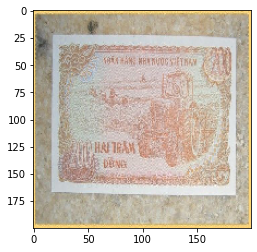

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/nhận diện tiền/Data/Test/tiengiay.JPG.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])

1/1 [==============================] - 0s 66ms/step
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3321985e-08
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
1/1 [==============================] - 0s 69ms/step
Đây là: 500d


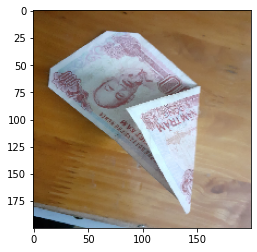

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/nhận diện tiền/Data/Train/500d/081e3055afed6eb337fc124.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])